In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("dataset1.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
m = len(y)
iteration = 2000
alpha = 0.01
x_bias = np.ones(m).reshape(-1, 1)
theta = np.zeros(3)
X = np.concatenate((x_bias, X), axis = 1)
y = np.array(y).reshape(-1,1)

In [2]:
for b in range (0, iteration):
    hypo1 = np.sum(theta*X, axis = 1).reshape(-1, 1)
    hypo = []
    for i in range (0, m):
        hypo2 = np.array(1/(1+np.exp(-hypo1[i])))
        hypo = np.concatenate((hypo, hypo2), axis = 0)
    hypo = np.array(hypo).reshape(-1, 1)

    for i in range (0, m):
        if hypo[i] > 0.5:
            hypo[i] = 1
        else:
            hypo[i] = 0

    theta = theta - alpha/m * np.sum((hypo-y)*X, axis = 0)
print(theta)


[ 0.0175      0.03476963 -0.04171839]


<AxesSubplot:xlabel='x1', ylabel='x2'>

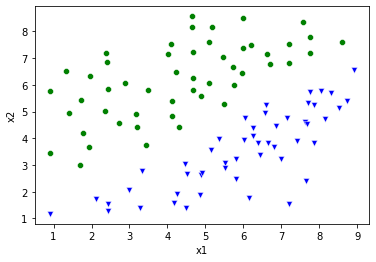

In [3]:
X_pos = data[data.y == 1]
X_neg = data[data.y == 0]

hypo1_plot = np.sum(theta*X, axis = 1).reshape(-1, 1)
hypo_plot = []
for i in range (0, m):
    hypo2_plot = np.array(1/(1+np.exp(-hypo1_plot[i])))
    hypo_plot = np.concatenate((hypo_plot, hypo2_plot), axis = 0)
hypo_plot = np.array(hypo_plot).reshape(-1, 1)

sns.scatterplot(data= X_pos, x = 'x1', y = 'x2', marker = 'v', color = 'b')
sns.scatterplot(data= X_neg, x = 'x1', y = 'x2', marker = 'o', color = 'g')


In [4]:
x_new = np.array([1, 3, 3])
y_pred = np.sum(theta*x_new)
y_pred = np.array(1/(1+np.exp(-y_pred)))
if y_pred > 0.5:
    print(f'features: {x_new[1:]}, belong to class 1')
else:
    print(f'features: {x_new[1:]}, belong to class 0')

features: [3 3], belong to class 0


In [66]:
data

,x1,x2,y
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1
...,...,...,...
95,5.9868,7.3641,0
96,4.6711,6.2592,0
97,7.5810,8.3703,0
98,4.6457,8.5676,0
